In [98]:
import numpy as np
from sklearn.datasets import load_digits
data = load_digits()
X = []
X1 = []
X2 = []
Y1 = []
Y2 = []
target = []
for i in range(len(data.data)):
    if data.target[i] == 0:
        X1.append(data.data[i])
        Y1.append(data.target[i])
        X.append(data.data[i])
        target.append(data.target[i])
    if data.target[i] == 1:
        X2.append(data.data[i])
        Y2.append(data.target[i])
        X.append(data.data[i])
        target.append(data.target[i])
X = np.array(X)
X1 = np.array(X1)
X2 = np.array(X2)
Y1 = np.array(Y1)
Y2 = np.array(Y2)
target = np.array(target)
print(X.shape)
print(target.shape)
print(X1.shape,Y1.shape)
print(X2.shape,Y2.shape)

(360, 64)
(360,)
(178, 64) (178,)
(182, 64) (182,)


In [99]:
mu1 = X1.mean(0).reshape((X1.T.shape[0],1))
mu2 = X2.mean(0).reshape((X2.T.shape[0],1))
print(mu1.shape,mu2.shape)

(64, 1) (64, 1)


In [100]:
S1 = (X1.T-mu1) @ (X1.T-mu1).T
S2 = (X2.T-mu2) @ (X2.T-mu2).T
print(S1.shape, S2.shape)

(64, 64) (64, 64)


In [101]:
Sw = S1 + S2
Sb = (mu1-mu2) @ (mu1-mu2).T
print(Sw.shape,Sb.shape)

(64, 64) (64, 64)


In [89]:
w = np.linalg.pinv(Sw)@(mu1-mu2)
print(w.shape)

(64, 1)


In [102]:
matrix = np.linalg.pinv(Sw)@Sb

w, v = np.linalg.eig(matrix)
w_= v[v.shape[0]-5,:]

In [103]:
#Y = w.T @ X.T
Y = (w_.T @ X.T)
print(Y.shape)
Y_ = Y.reshape(target.shape[0],1)
print(Y_.shape)
color = {0:'r.', 1:'g.'}

(360,)
(360, 1)


In [104]:
result = np.hstack((Y_, target.reshape(target.shape[0],1)))
print(result)

[[-1.76771543+0.32156017j  0.        +0.j        ]
 [-2.60197944+0.13403081j  1.        +0.j        ]
 [-2.85987198+0.19517632j  0.        +0.j        ]
 [-3.02487649+0.52707515j  1.        +0.j        ]
 [-2.59531416+0.41387364j  0.        +0.j        ]
 [-2.44325656+0.29159958j  1.        +0.j        ]
 [-1.55502625+0.34713217j  0.        +0.j        ]
 [-2.72676514+0.33034185j  0.        +0.j        ]
 [-2.26817662+0.35991403j  1.        +0.j        ]
 [-2.45622058+0.18122462j  1.        +0.j        ]
 [-1.93134742+0.53186672j  0.        +0.j        ]
 [-1.79142955+0.45989011j  0.        +0.j        ]
 [-2.73022494+0.36754987j  0.        +0.j        ]
 [-3.03713307+0.10075029j  1.        +0.j        ]
 [-2.72709225-0.14751545j  1.        +0.j        ]
 [-2.33203999+0.08845714j  0.        +0.j        ]
 [-1.06260719+0.0126729j   0.        +0.j        ]
 [-0.86228715+0.46252276j  0.        +0.j        ]
 [-2.37276578+0.27273668j  1.        +0.j        ]
 [-2.28767448+0.36815357j  1.  

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until


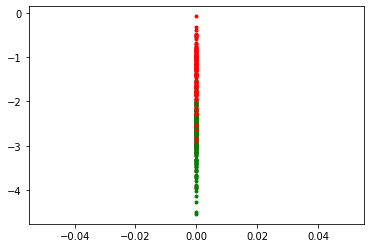

In [105]:
import matplotlib.pyplot as plt
for i in result:
    plt.plot(i[0],color[int(i[1])])
plt.show()

In [106]:
min = np.min(Y_)
max = np.max(Y_)
print(min,max)

(-4.541541833991325+0.010786341583687378j) (-0.07635669896800681+0.12592157014587785j)


In [107]:
trasholds = np.linspace(min,max,360)
#print(trasholds)

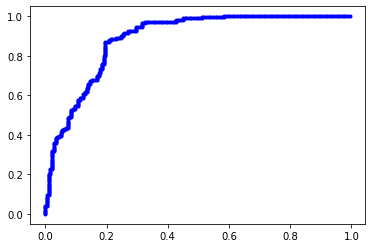

In [108]:
TPR = []
FPR = []
# infinity_min = X[:,0].min()
# infinity_max = X[:,0].max()

for step in range(X.shape[0]):
    ind_TP = (result[:,0]>=result[step][0]) & (result[:,1]==1)
    ind_FP = (result[:,0]<result[step][0]) & (result[:,1]==0)
    ind_P = (result[:,1]==1)
    ind_N = (result[:,1]==0)
    TP = result[ind_TP,:].shape[0]
    FP = result[ind_FP,:].shape[0]
    #print('TP, FP =',TP, FP)
    P = result[ind_P,:].shape[0]
    N = result[ind_N,:].shape[0]
    TPR.append(1-TP/P)
    FPR.append(FP/N)
                
ind = np.argsort(FPR)
# print(ind)
FPR = np.array(FPR)[ind]
TPR = np.array(TPR)[ind]
plt.plot(FPR, TPR,'b.')
plt.show()